In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import calendar
from covis.utils import get_project_root

sns.set_style("whitegrid")
sns.set_palette("tab20")

# rose plot for monthly deaths by cause, 2021

In [2]:
rows = [6,10,14,18]
# rows.extend(range(82,92))

weekly_cause = pd.read_excel(
    get_project_root() / "data/publishedweek522021.xlsx",
    sheet_name="Weekly figures by cause",
    skiprows=lambda x: x not in rows
)

weekly_cause = weekly_cause.set_index("Week ended").transpose()

for col in weekly_cause.columns:
    weekly_cause.rename(columns={col:col.replace("Deaths involving ", "").replace(" (any mention on the death certificate)", "")}, inplace=True)

# print(f"total deaths 2021\n{weekly_cause.shape}")
weekly_cause.head()

Week ended,respiratory disease,influenza and pneumonia,COVID-19
2021-01-08 00:00:00,7025,4649,6057
2021-01-15 00:00:00,7497,5273,7245
2021-01-22 00:00:00,7837,5696,8422
2021-01-29 00:00:00,7816,5719,8433
2021-02-05 00:00:00,7039,4993,7320


In [3]:
weekly_cause.index = pd.to_datetime(weekly_cause.index)

In [4]:
weekly_cause.groupby(by=weekly_cause.index.month).sum()

Week ended,respiratory disease,influenza and pneumonia,COVID-19
1,30175,21337,30157
2,22684,15455,20004
3,13281,7388,5288
4,13087,6156,1606
5,10082,4390,482
6,9565,4114,383
7,13374,6192,1241
8,12089,5941,2336
9,12822,6707,3255
10,16908,8711,3813


In [5]:
monthly_cause = weekly_cause.groupby(pd.Grouper(freq="M")).sum()

In [6]:
months = {mon:calendar.month_name[mon.month] for mon in monthly_cause.index}
monthly_cause.rename(index=months, inplace=True)

monthly_cause.rename_axis("", axis="columns", inplace=True)

In [7]:
monthly_cause

,respiratory disease,influenza and pneumonia,COVID-19
January,30175,21337,30157
February,22684,15455,20004
March,13281,7388,5288
April,13087,6156,1606
May,10082,4390,482
June,9565,4114,383
July,13374,6192,1241
August,12089,5941,2336
September,12822,6707,3255
October,16908,8711,3813


<Axes: >

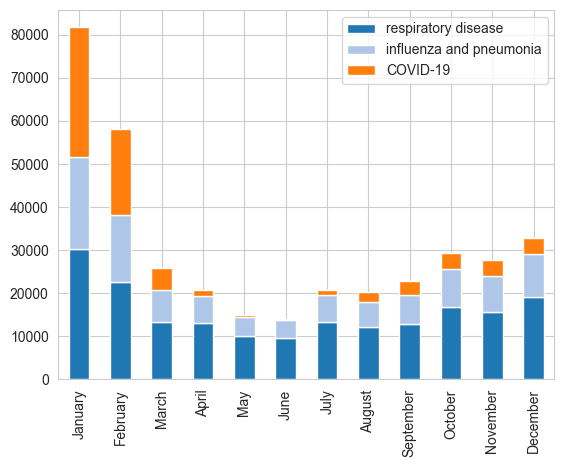

In [8]:
monthly_cause.plot(
    kind="bar",
    stacked=True
)

In [9]:
fig = go.Figure()

fig.add_trace(go.Barpolar(
    r = list(monthly_cause["respiratory disease"]),
    theta=list(monthly_cause.index),
    name = "respiratory disease",
    # marker_color="rgb(46,109,255)",
    marker_color="#869FB7",
    # marker_line_color="black",
    # hoverinfo = ["all"],
    hovertemplate="deaths: %{r}",
    opacity=0.9  
))


fig.add_trace(go.Barpolar(
    r = list(monthly_cause["influenza and pneumonia"]),
    theta=list(monthly_cause.index),
    name = "influenza and pneumonia",
    marker_color="#3D6BA6",
    # marker_line_color="black",
    # hoverinfo = ["all"],
    hovertemplate="deaths: %{r}",
    opacity=0.9
))

fig.add_trace(go.Barpolar(    
    r = list(monthly_cause["COVID-19"]),
    theta=list(monthly_cause.index),
    name = "COVID-19",
    marker_color="#5D635F",
    # marker_line_color="black",
    # hoverinfo = ["all"],
    hovertemplate="deaths: %{r}",
    opacity=0.9
))

fig.update_layout(
    title="2021 monthly deaths by selected cause",
    font_size=12,
    legend_font_size=15,
    polar_angularaxis_rotation=90,
    width=700,
    height=700,
    legend_x=-0.1,
    legend_y=-0.2,
    polar = dict(
        #   bgcolor = "rgb(223, 223, 223)",
        bgcolor="white",
        angularaxis=dict(
            linewidth = 0.1,
            showline=False,
            linecolor="grey",
        ),
        radialaxis=dict(        
            showline = False,
            linewidth = 0.1,
            gridcolor = "grey",
            gridwidth = 0.1,
        )
    ),
)

fig.update_polars(
    angularaxis_direction="clockwise"
)

In [12]:
# fig.write_image(
#     get_project_root() / "figures/rose_causes.png"
# )

# fig.write_image(
#     get_project_root() / "figures/rose_causes.svg"
# )

# fig.write_html(
#     get_project_root() / "output/rose_causes.html"
# )